In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN,Dropout
from keras.callbacks import History


import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM


import time #helper libraries
from sklearn.preprocessing import MinMaxScaler

from numpy import newaxis

import time

# For time stamps
from datetime import datetime

#for dataset
import yfinance as yf

In [4]:
stock_data = yf.download('TCS',start='2012-01-01',end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [6]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-01 00:00:00-04:00,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
2013-11-04 00:00:00-05:00,36.799999,36.799999,34.689999,35.349998,33.044563,1586600
2013-11-05 00:00:00-05:00,35.110001,35.500000,34.820000,35.349998,33.044563,337700
2013-11-06 00:00:00-05:00,35.610001,36.490002,35.610001,35.900002,33.558697,549600
2013-11-07 00:00:00-05:00,36.799999,36.799999,34.119999,35.310001,33.007175,883700


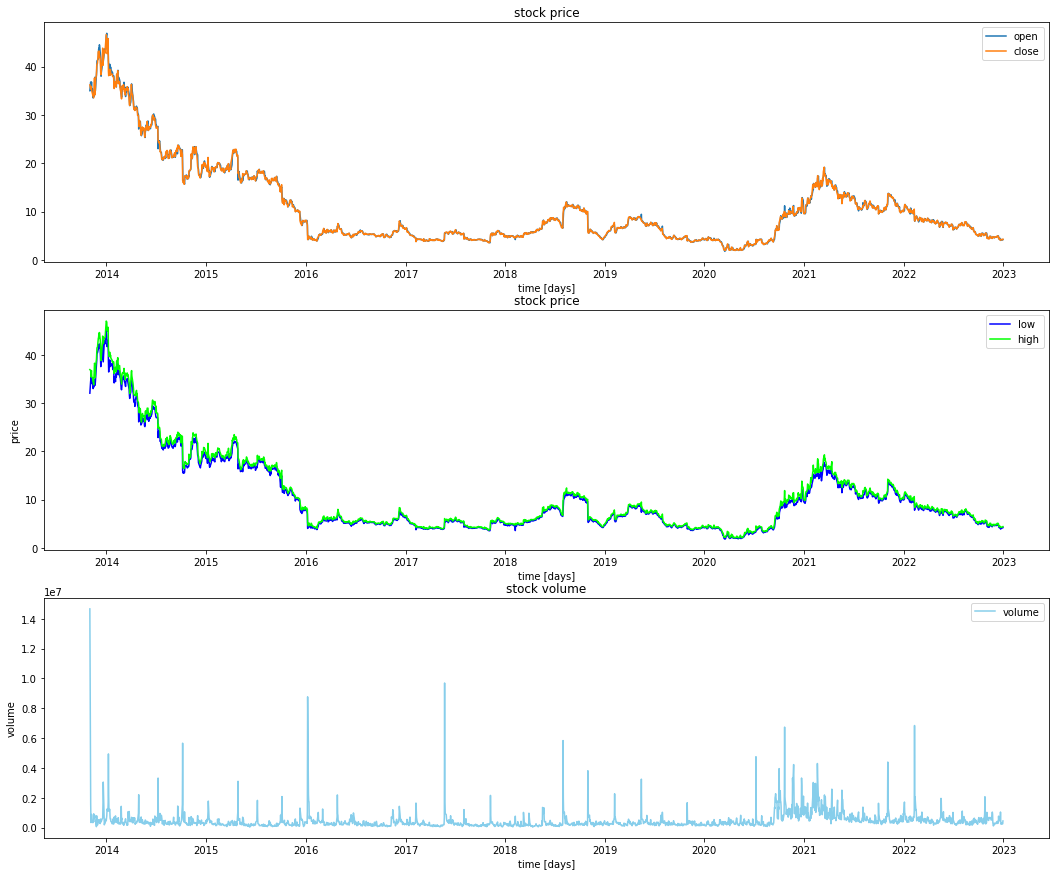

In [11]:
plt.figure(figsize=(18,15));
plt.subplot(3,1,1)
plt.plot(stock_data['Open'], label='open')
plt.plot(stock_data['Close'], label='close')
#plt.gca().invert_xaxis()
plt.title('stock price')
plt.xlabel('time [days]')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(stock_data['Low'], color='blue', label='low')
plt.plot(stock_data['High'], color='lime', label='high')
#plt.gca().invert_xaxis()
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(3,1,3)
plt.plot(stock_data['Volume'], color='skyblue', label='volume')
#plt.gca().invert_xaxis()
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [12]:
stock_data.shape


(2307, 6)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
#splitting the data
close_prices= stock_data.filter(['Close']) #creates a dataframe just with specified column( close )
values = close_prices.values
training_data_len = math.ceil(len(values) * 0.8)

In [16]:
scaled_data=scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len,:]

In [17]:
window_size = 60
x_train=[]
y_train=[]
for i in range(window_size,len(train_data)):
  x_train.append(train_data[i-window_size:i,0])
  y_train.append(train_data[i,0])

In [18]:
x_train,y_train=np.array(x_train),np.array(y_train)


In [19]:
test_data = scaled_data[training_data_len - window_size: , :]
x_test=[]
y_test= values[training_data_len:]
for j in range(window_size,len(test_data)):
  x_test.append(test_data[j-window_size:j,0])

x_test=np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1786, 60)
y_train.shape =  (1786,)
x_test.shape =  (461, 60, 1)
y_test.shape =  (461, 1)


In [21]:
#Building the model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='tanh'), input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.build((x_train.shape[1],1)) 
model.add(Dense(1))

In [22]:
start = time.time()
model.compile(loss='mse',  optimizer='adam', metrics=['accuracy'])
print ('compilation time : ', time.time() - start)

compilation time :  0.01603531837463379


In [24]:
history=model.fit(x_train, y_train, epochs=50, batch_size=32,validation_split=0.2,  verbose=1 , shuffle=True)


Epoch 1/50
45/45 [==============================] - 6s 45ms/step - loss: 0.0062 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0028
Epoch 2/50
45/45 [==============================] - 1s 24ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0028
Epoch 3/50
45/45 [==============================] - 1s 25ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 9.1829e-04 - val_accuracy: 0.0028
Epoch 4/50
45/45 [==============================] - 1s 24ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 7.2401e-04 - val_accuracy: 0.0028
Epoch 5/50
45/45 [==============================] - 1s 25ms/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: 6.7689e-04 - val_accuracy: 0.0028
Epoch 6/50
45/45 [==============================] - 1s 25ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 4.2811e-04 - val_accuracy: 0.0028
Epoch 7/50
45/45 [==============================] - 1s 27ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss:

In [25]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

15/15 [==============================] - 1s 12ms/step


In [26]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
mse = np.mean(predictions - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  0.3026218915968293
MSE :  0.0915800092736431
R2 :  0.9700760678327383


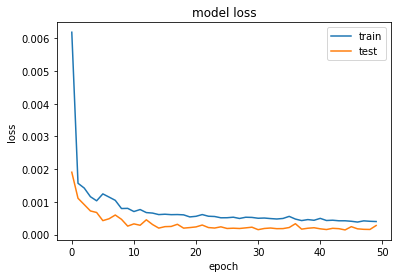

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


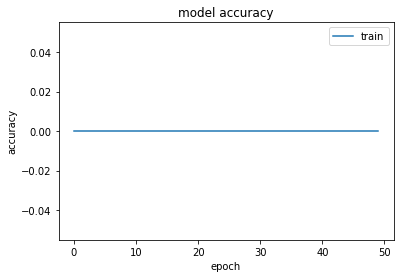

In [28]:
print(history.history.keys())

# summarize history for accuracy

plt.size=(10,5)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [29]:
print('accuracy =',history.history['accuracy'][-1])

accuracy = 0.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_19040\4220012384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['predictions'] = predictions


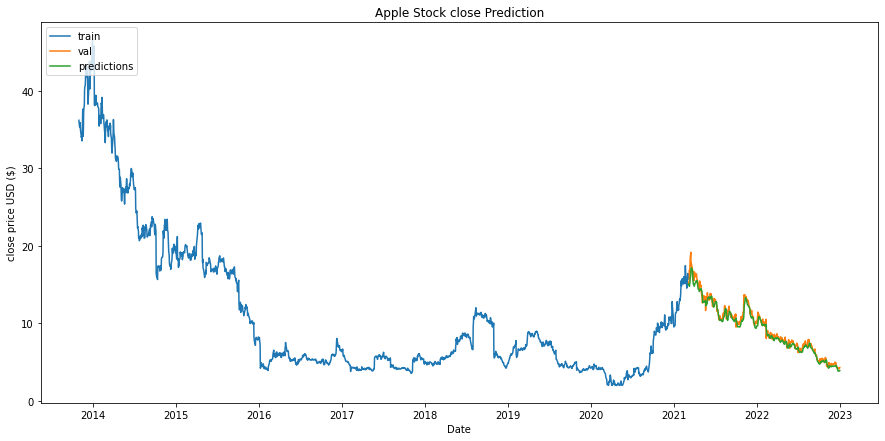

In [32]:
data1 = stock_data.filter(['Close'])
train= data1[:training_data_len]
validation = data1[training_data_len:]
validation['predictions'] = predictions

plt.figure(figsize=(15, 7))
plt.title('Apple Stock close Prediction')
plt.xlabel('Date')
plt.ylabel('close price USD ($)')
plt.plot(train)
plt.plot(validation[['Close','predictions']])
plt.legend(['train','val','predictions'],loc='upper left')
plt.show()

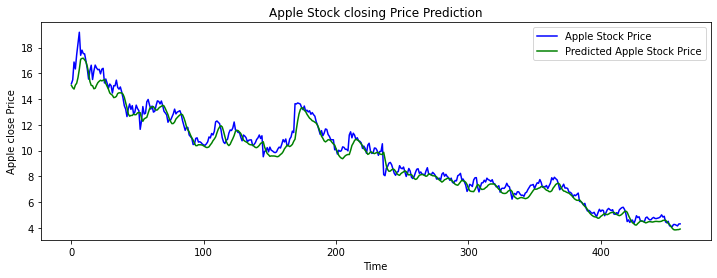

In [33]:
plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Apple Stock Price')
plt.plot(predictions, color='green', label='Predicted Apple Stock Price')

plt.title('Apple Stock closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple close Price')
plt.legend()
plt.show()
     